# 패키지 로딩

In [1]:
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, MaxPool2D, Conv2D, InputLayer, Flatten

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 하이퍼파라미터 설정

In [3]:
TOTAL_CLASS = 10
SAMPLE = 5
EPOCH = 10
BATCH = 200

# 데이터 로딩 및 확인

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

- Fashion MNIST Labels : https://keras.io/api/datasets/fashion_mnist
- 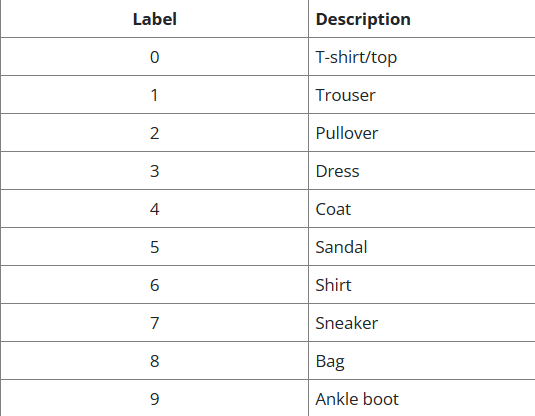

16055번째 샘플데이터는 Dress이다


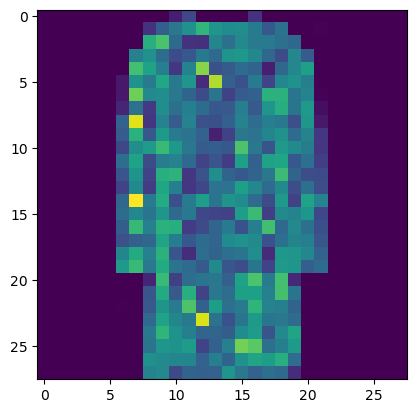

In [9]:
labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
sample_no = np.random.randint(0,60000)
sample = x_train[sample_no]
print(f'{sample_no}번째 샘플데이터는 {labels[y_train[sample_no]]}이다')
plt.imshow(sample)
plt.show()

In [11]:
unique,counts = np.unique(y_train, return_counts=True)
print('Label\tDescription\tCount')
print('--------------------------------------')
for i in range(TOTAL_CLASS):
    print(f'{unique[i]:^5d}\t{labels[i]:10s}\t{counts[i]:4d}')

Label	Description	Count
--------------------------------------
  0  	T-shirt/top	6000
  1  	Trouser   	6000
  2  	Pullover  	6000
  3  	Dress     	6000
  4  	Coat      	6000
  5  	Sandal    	6000
  6  	Shirt     	6000
  7  	Sneaker   	6000
  8  	Bag       	6000
  9  	Ankle boot	6000


# 데이터 스케일링

In [12]:
x_train = x_train /255
x_test = x_test/255

# 입력 데이터 모양 변경
- 가로 pixel X, 세로 pixel X 채널 수

In [13]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)
x_train.shape

(60000, 28, 28, 1)

# 모델 생성

In [15]:
model = Sequential()
model.add(InputLayer(input_shape=(28,28,1)))
model.add(Conv2D(filters=32,kernel_size=(2,2),padding='same',activation='relu'))
model.add(MaxPool2D(padding='same',pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(2,2),padding='same',activation='relu'))
model.add(MaxPool2D(padding='same',pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(TOTAL_CLASS,activation='softmax'))

model.summary()

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 32)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 411,242 (1.57 MB)

 Trainable params: 411,242 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

# 모델 학습 및 저장
- 분류모형의 손실함수 종류
  >- 타입, 활성화 함수, 손실함수
  >- 이진분류: sigmoid, 손실함수 binary_crossentropy
  >- 다지분류(싱글레이블-MNIST fashion item)- 라벨인코딩 상태 softmax 'sparse_categorical_crossentropy'
  >- 원핫 인코딩 상태 softmax 'categorical_crossentropy'

In [16]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=EPOCH, batch_size=BATCH,verbose=1)
model.save('fashion_item.h5')

Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 33s 98ms/step - accuracy: 0.7390 - loss: 0.7906
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 30s 99ms/step - accuracy: 0.8772 - loss: 0.3503
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 41s 97ms/step - accuracy: 0.8959 - loss: 0.2919
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 31s 104ms/step - accuracy: 0.9036 - loss: 0.2638
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 40s 99ms/step - accuracy: 0.9105 - loss: 0.2423
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 30s 99ms/step - accuracy: 0.9155 - loss: 0.2285
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 29s 98ms/step - accuracy: 0.9221 - loss: 0.2133
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 44s 104ms/step - accuracy: 0.9281 - loss: 0.1975
Epoch 9/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 41s 105ms/step - accuracy: 0.9311 - loss: 0.1879
Epoch 10/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 33s 109ms/step - accuracy: 0.9368 - loss: 0.1744


# 모델평가

In [20]:
score = model.evaluate(x_test,y_test)
print(f'Loss:{score[0]:.3f}')
print(f'Accuracy:{score[1]:.3f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9143 - loss: 0.2488
Loss:0.243
Accuracy:0.912


In [22]:
from sklearn.metrics import confusion_matrix
y_pred_prob = model.predict(x_test)
print(y_pred_prob.shape)
y_hat = np.argmax(y_pred_prob,axis=1)
matrix = confusion_matrix(y_test,y_hat)
print(matrix)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
(10000, 10)
[[844   1  10  14   5   1 118   0   6   1]
 [  0 992   0   6   0   0   0   0   2   0]
 [ 18   2 831   4  73   0  72   0   0   0]
 [ 15  18  11 899  25   0  30   0   2   0]
 [  1   2  27  24 910   0  36   0   0   0]
 [  0   0   0   0   0 989   0   5   0   6]
 [ 83   4  36  24  87   0 758   0   8   0]
 [  0   0   0   0   0  24   0 937   0  39]
 [  2   2   0   1   3   1   2   0 989   0]
 [  1   0   0   0   0   9   0  16   0 974]]


In [23]:
from sklearn.metrics import f1_score, roc_auc_score
f1_score = f1_score(y_test,y_hat,average='macro')
print(f'F1-Score:{f1_score:.3f}')
auc = roc_auc_score(y_test,y_pred_prob,multi_class='ovr')
print(f'AUC:{auc:.3f}')

F1-Score:0.912
AUC:0.995


# 모델 예측

In [26]:
import keras
loaded_model = keras.models.load_model('fashion_item.h5')
sample_no = np.random.randint(0,10000)
sample = x_test[sample_no]
sample = sample.reshape(1,28,28,1)
pred = loaded_model.predict(sample)
print('샘플데이터 패션 아이템:',labels[y_test[sample_no]])
print('샘플데이터 예측패션 아이템:',labels[np.argmax(pred)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
샘플데이터 패션 아이템: T-shirt/top
샘플데이터 예측패션 아이템: Bag
